<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/Economic_Data_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fredapi > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
color_pal =plt.rcParams['axes.prop_cycle'].by_key()['color']
from fredapi import Fred

In [ ]:
fred_key='8ce580bb435d6b66b9bae2e20dbb0a0f'

# Create the Fred Object

In [ ]:
fred=Fred(api_key=fred_key)

#Search for Economic Data

In [ ]:
sp_search=fred.search('S$P',order_by='popularity')

# Pull Raw Data and Plot

In [ ]:
sp500=fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

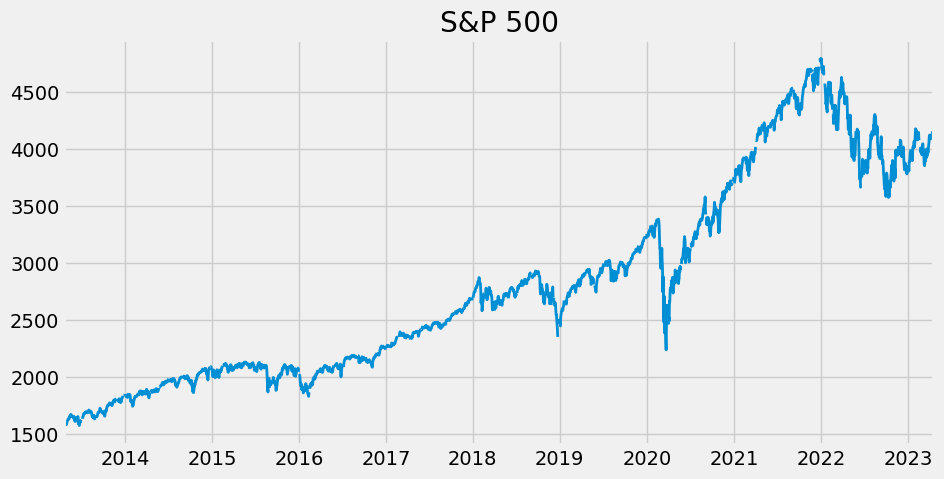

In [ ]:
sp500.plot(figsize=(10,5),title="S&P 500",lw=2)

# Pull and Join Multiple Data Series

In [ ]:
unemp_results=fred.search('unemployment')

In [ ]:
unrate=fred.get_series(series_id='UNRATE')

<Axes: title={'center': 'unrate'}>

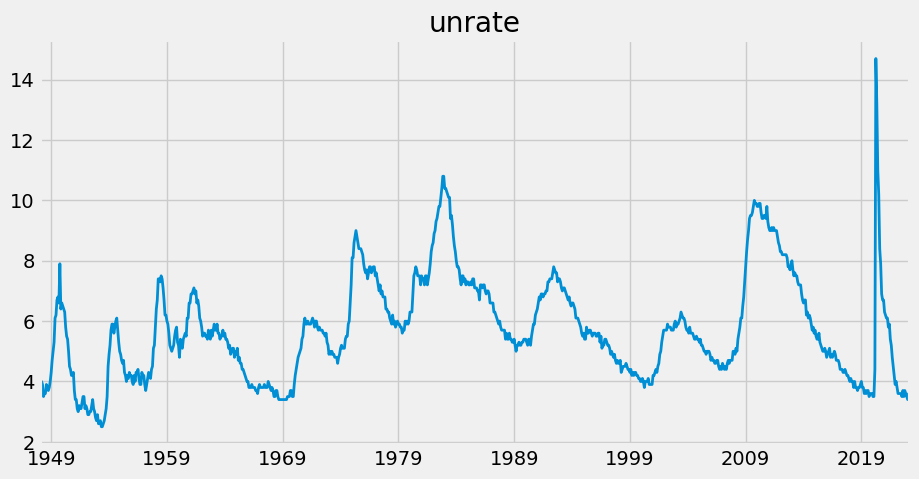

In [ ]:
unrate.plot(figsize=(10,5),title="unrate",lw=2)

In [ ]:
unemp_df=fred.search('unemployment rate state',filter=('frequency','Monthly'))

In [ ]:
unemp_df=unemp_df[(unemp_df['seasonal_adjustment']=='Seasonally Adjusted') & (unemp_df['units']=='Percent')]

In [ ]:
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

In [ ]:
unemp_df=unemp_df[~unemp_df['title'].str.contains('Region')]

In [ ]:
unemp_df=unemp_df[~unemp_df['title'].str.contains('Division')]

In [ ]:
len(unemp_df.index)

54

In [ ]:
id_to_state=unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
all_results=[]
for myid in unemp_df.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_results.append(results) 
unemp_results=pd.concat(all_results,axis=1)
unemp_states=unemp_results.dropna()   
unemp_states.columns=[id_to_state [c] for c in unemp_results.columns]    

In [ ]:
#unemp_states=unemp_results.drop(['LNS14000006','M0892AUSM156SNBR','LNS14000002','U2RATE','LASMT261982000000003', 'LNS14000024', 'LNS14000031','LNS14000009', 'LNS14000001', 'LNS14027660', 'LNS14027662','LNS14000003', 'LRUN64TTUSM156S','LNS14032183','LNS14027659','LNS14000018','LNS14000012','LRUNTTTTUSM156S','LNS14024887','LNS14000032','LASMT391746000000003','LRHUTTTTUSM156S','LNS14000060','LNS14000028','LNS14000036', 'LNS14027689','LNS14000029', 'LRUN24TTUSM156S', 'LNS14024230',
        #'LNS14000048', 'LNS14000089', 'LNS14000026','LNS14200000', 'LNS14000150', 'LNS14000025','UNRATE'],axis=1)

In [ ]:
#unemp_states=unemp_states.drop(['LNS14000091', 'LNS14100000','LNS14000093','LNS14000315','LNS14000062','LNS14000315','CNEWUR','CNERUR', 'CWSTUR','CMWRUR'],axis=1)

In [ ]:
#unemp_states=unemp_states.drop(['CSOUUR','LNS14000015'],axis=1)

In [ ]:
px.line(unemp_states)

# Pull April 2020 Unemployment Rate per State

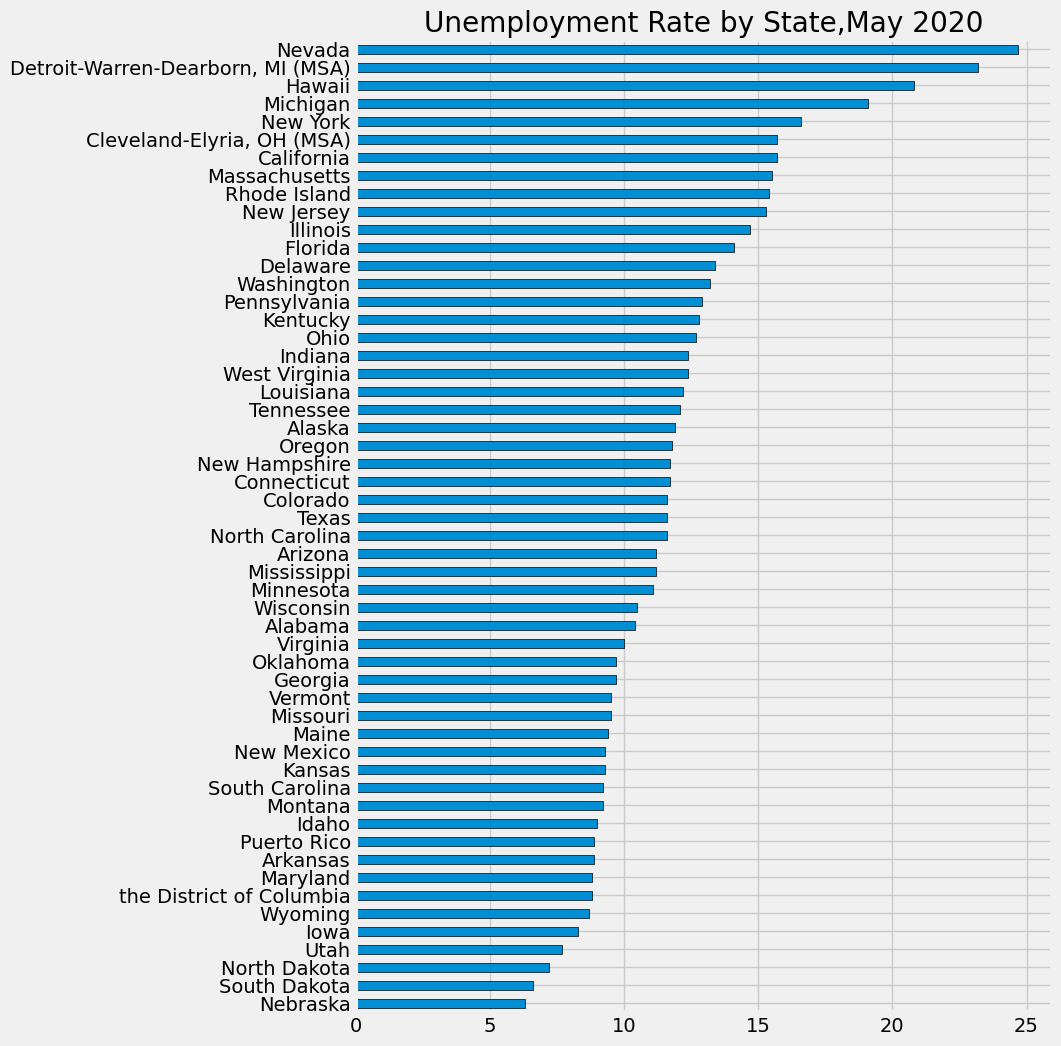

In [ ]:
ax=unemp_states.loc[unemp_states.index=='2020-05-01'].T\
.sort_values('2020-05-01')\
.plot(kind='barh',figsize=(8,12),width=0.5,edgecolor='black',title='Unemployment Rate by State,May 2020')
ax.legend().remove()
plt.show();

# Pull Participation Rate

In [ ]:
part_df=fred.search('participation rate state',filter=('frequency','Monthly'))
part_df=part_df.query('seasonal_adjustment =="Seasonally Adjusted" and units=="Percent"')

In [ ]:
part_df=part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]

In [ ]:
part_id_to_state=part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
all_results=[]
for myid in part_df.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_results.append(results)
part_states=pd.concat(all_results,axis=1)
part_states.columns=[part_id_to_state [c] for c in part_states.columns]    

# Plot Unemployment vs Participation

Text(0.5, 1.0, 'New York')

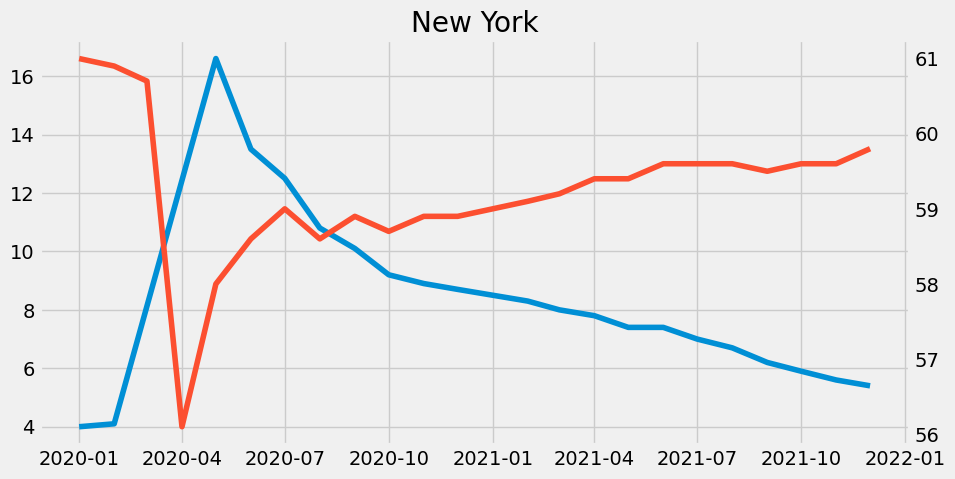

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax2=ax.twinx()
ax.plot(unemp_states.query('index>=2020 and index <2022')['New York'],label='Unemployment')
ax2.plot(part_states.query('index>=2020 and index <2022')['New York'],label='Participation',color=color_pal[1])
ax2.grid(False)
ax.set_title('New York')

In [ ]:
# Fix DC
unemp_states=unemp_states.rename(columns={'the District of Columbia':'District of Columbia'})

In [ ]:
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Ohio', 'Pennsylvania',
       'Michigan', 'Minnesota', 'Illinois', 'Alabama', 'North Carolina',
       'Kentucky', 'Colorado', 'New Jersey', 'Massachusetts', 'Wisconsin',
       'Virginia', 'New Mexico', 'Georgia', 'Arizona', 'Tennessee', 'Alaska',
       'Oregon', 'Indiana', 'Washington', 'Missouri', 'Utah', 'West Virginia',
       'South Carolina', 'Kansas', 'Iowa', 'Detroit-Warren-Dearborn, MI (MSA)',
       'North Dakota', 'Arkansas', 'Oklahoma', 'South Dakota', 'Puerto Rico',
       'Nevada', 'Louisiana', 'Maine', 'Montana', 'Mississippi', 'Maryland',
       'Nebraska', 'Hawaii', 'Idaho', 'Connecticut',
       'Cleveland-Elyria, OH (MSA)', 'New Hampshire', 'Delaware', 'Wyoming',
       'District of Columbia', 'Rhode Island', 'Vermont'],
      dtype='object')

In [ ]:
unemp_states=unemp_states.drop(['Detroit-Warren-Dearborn, MI (MSA)','Cleveland-Elyria, OH (MSA)'],axis=1)

In [ ]:
unemp_states=unemp_states.drop(['Puerto Rico'],axis=1)

In [ ]:
part_states.columns

Index(['California', 'Wisconsin', 'Florida', 'Alabama', 'Minnesota',
       'New York', 'Texas', 'Ohio', 'Michigan', 'Kentucky', 'Colorado',
       'Tennessee', 'North Carolina', 'Iowa', 'Virginia', 'Louisiana',
       'Illinois', 'Pennsylvania', 'Mississippi', 'New Mexico', 'Indiana',
       'Utah', 'Missouri', 'Georgia', 'Maine', 'West Virginia', 'Arizona',
       'Massachusetts', 'Oregon', 'New Jersey', 'Maryland', 'North Dakota',
       'Oklahoma', 'Arkansas', 'Connecticut', 'Montana', 'South Carolina',
       'Hawaii', 'Nebraska', 'Alaska', 'Washington', 'Idaho', 'Kansas',
       'New Hampshire', 'Vermont', 'Nevada', 'South Dakota', 'Wyoming',
       'Delaware', 'District Of Columbia', 'Rhode Island'],
      dtype='object')

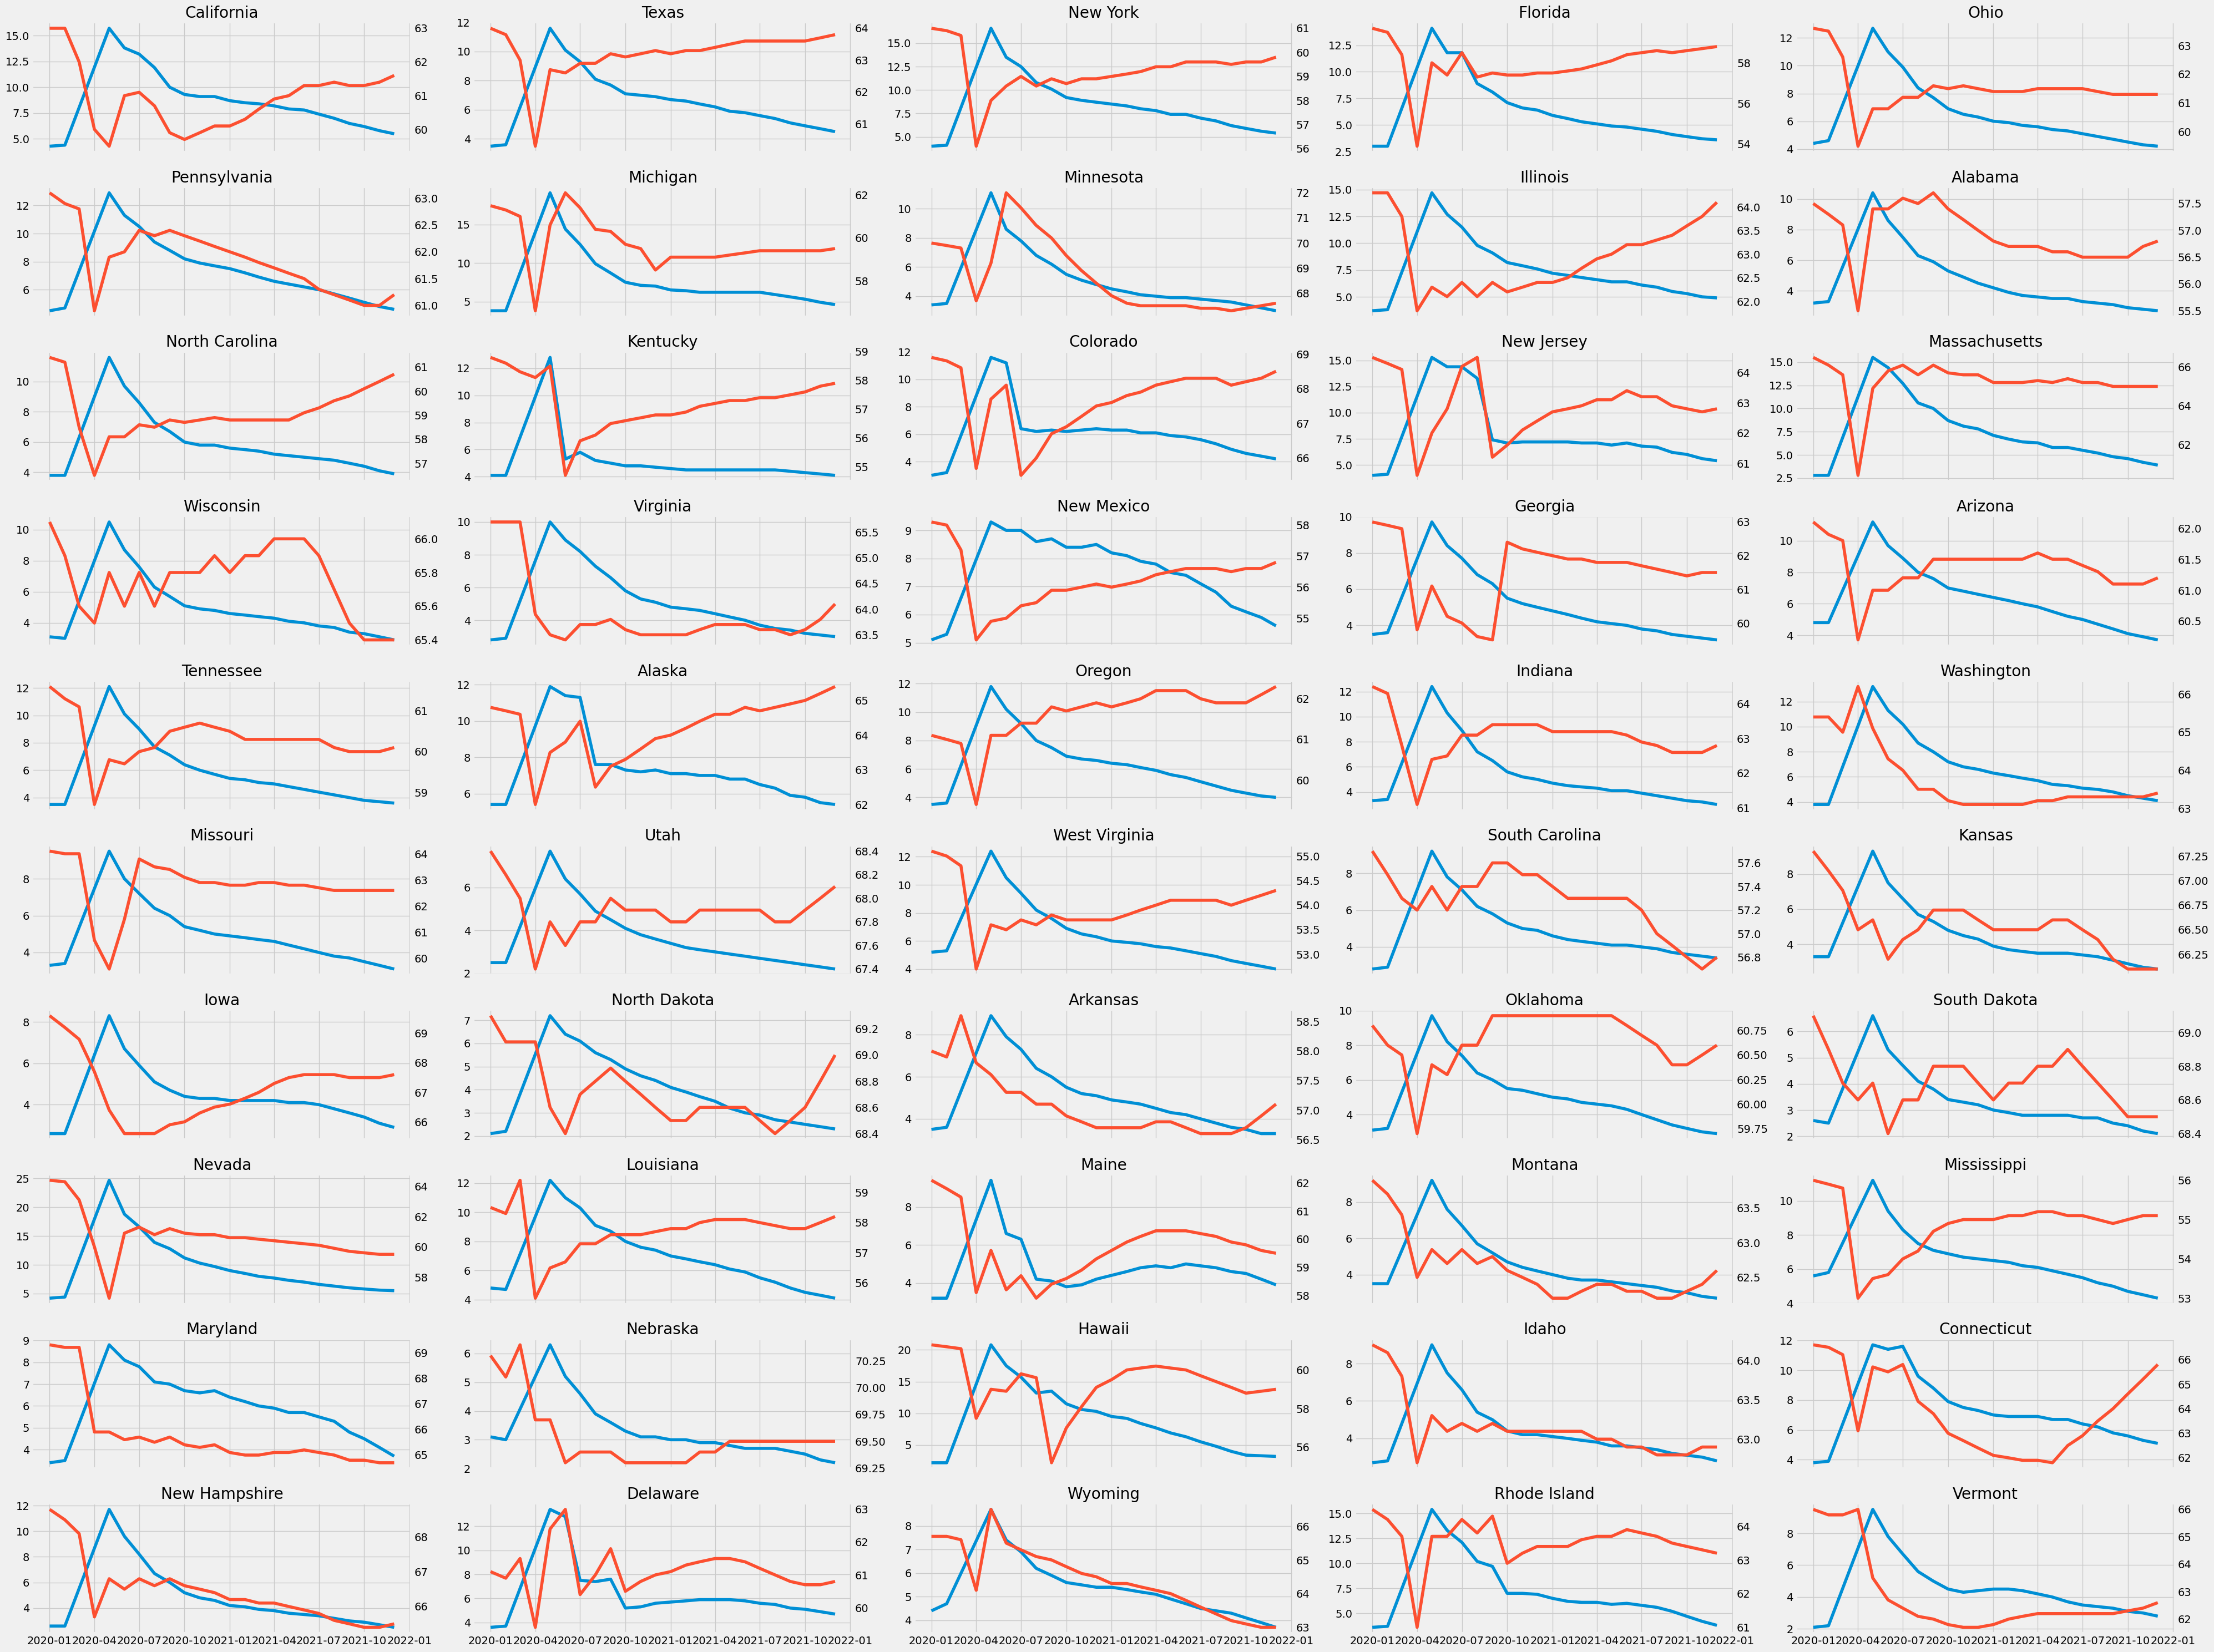

In [ ]:
fig,axs=plt.subplots(10,5,figsize=(40,30),sharex=True)
axs=axs.flatten()

i=0
for state in unemp_states.columns:
    if state=='District of Columbia':
        continue
    ax2=axs[i].twinx()
    axs[i].plot(unemp_states.query('index>=2020 and index <2022')[state],label='Unemployment')
    ax2.plot(part_states.query('index>=2020 and index <2022')[state],label='Participation',color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i+=1
plt.tight_layout()
plt.show()    

# The End